In [90]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

In [91]:
clean = pd.read_excel("Clean.xlsx")

In [92]:
category = ["Price-Sensitive Customers" , "Product-Focused Customers" , "Loyalty-Driven Customers" , "Convenience-Oriented Customers" , "High-Value Customers"]

categories = []

for i in category:
    df = pd.read_excel("Category.xlsx" , sheet_name = i)
    categories.append(df)

In [93]:
df = categories[2]
df

,Purchase frequency,Sale Price,Shopee-Paid Bundle Deal Discount
0,1.0,199.0,0
1,3.0,22.0,0
2,3.0,59.0,0
3,3.0,55.0,0
4,3.0,49.0,0
...,...,...,...
16600,4.0,35.0,0
16601,4.0,35.0,0
16602,3.0,49.0,0
16603,3.0,48.0,0


In [94]:
df.dropna(inplace = True)

In [95]:
df.columns

Index(['Purchase frequency', 'Sale Price', 'Shopee-Paid Bundle Deal Discount'], dtype='object')

**Data Preprocessing**

In [96]:
scaler = MinMaxScaler()
for feature in df.columns:
    df[[feature]] = scaler.fit_transform(df[[feature]])

In [97]:
sse = []
k_range = range(1 , 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

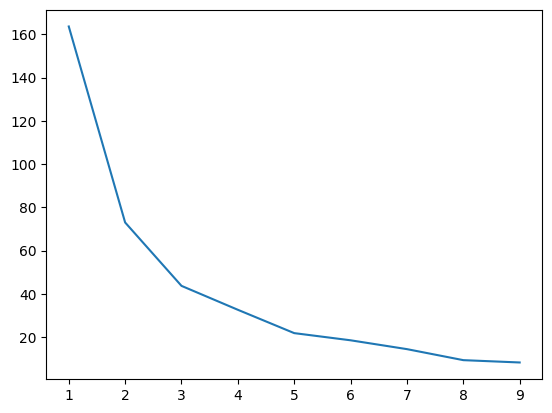

In [98]:
plt.plot(k_range , sse)

In [99]:
#4 is the elbow point
km = KMeans(n_clusters= 3)

In [100]:
km.fit(df)

KMeans(n_clusters=3)

In [101]:
y_pred = km.predict(df)

df["cluster"] = y_pred

In [102]:
cluster_list = []
for i in range(3):
    cluster_list.append(df[df["cluster"] == i])

In [103]:
cluster_list[0]

,Purchase frequency,Sale Price,Shopee-Paid Bundle Deal Discount,cluster
0,0.000000,0.021092,0.0,0
1,0.076923,0.002332,0.0,0
2,0.076923,0.006253,0.0,0
3,0.076923,0.005829,0.0,0
4,0.076923,0.005193,0.0,0
...,...,...,...,...
16598,0.000000,0.006889,0.0,0
16599,0.000000,0.005193,0.0,0
16602,0.076923,0.005193,0.0,0
16603,0.076923,0.005087,0.0,0


In [104]:
# cluster_list[0][["Hour_sin"]].shape

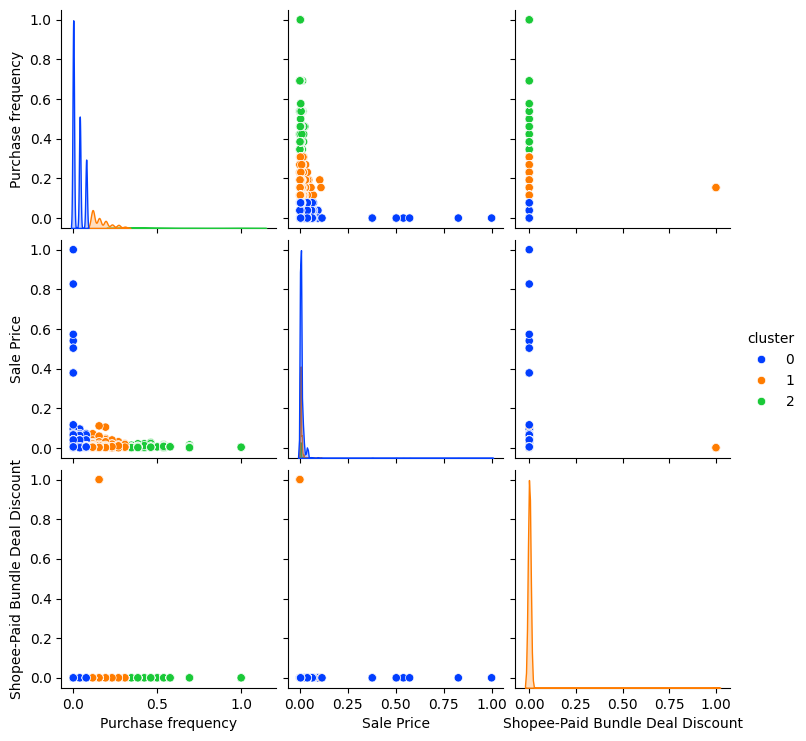

In [105]:
sns.pairplot(df , hue = "cluster" , palette= "bright")

<Axes: xlabel='Purchase frequency', ylabel='Sale Price'>

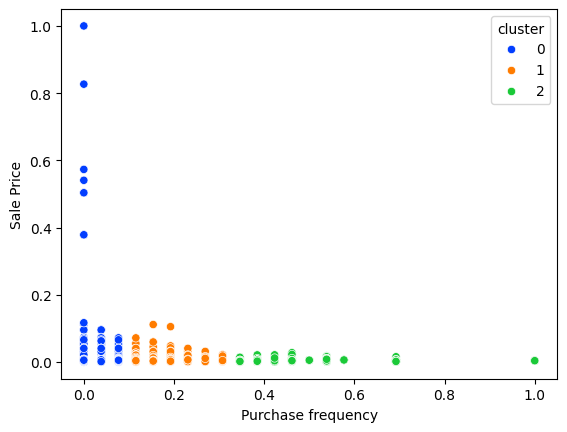

In [106]:
sns.scatterplot(data = df , x = "Purchase frequency" , y = "Sale Price" , hue = "cluster" , palette = "bright")

In [109]:
# cat = category[2]

# def add_cat(x):

#     if x["cluster"] == 0:
#         x[cat] = "High Price , New Customer"
#     elif x["cluster"] == 1:
#         x[cat] = "Medium-Low Price , Decent Customer"
#     elif x["cluster"] == 2:
#         x[cat] = "Low Price , Loyal Customer"

#     return x

# df = df.apply(add_cat , axis =  1)

# clean[cat] = df[cat]

In [110]:
# clean.to_excel("Clean.xlsx")